In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go
import seaborn as sns
import re

In [2]:
data= pd.read_excel('resturant.xlsx')

In [3]:
data.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [4]:
data.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [5]:
# Length of columns
len(data.columns)

17

In [6]:
# Droped unwanted columns
data.drop(['url', 'address','phone','reviews_list', 'menu_item','listed_in(city)'],inplace=True,axis=1)

In [7]:
data.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'dish_liked', 'cuisines', 'approx_cost(for two people)',
       'listed_in(type)'],
      dtype='object')

In [8]:
# Length of columns needed
len(data.columns)

11

In [9]:
# To check how many rows and columns are there using shape
data.shape

(51717, 11)

In [10]:
# Number of Duplicate Values
data.duplicated().sum()

16608

**Droping Duplicate values**

In [11]:
after_dropping_duplicate = data.drop_duplicates()

In [12]:
after_dropping_duplicate

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,Buffet
...,...,...,...,...,...,...,...,...,...,...,...
51712,Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,Whitefield,Bar,NaN,Continental,1500.0,Pubs and bars
51713,Vinod Bar And Restaurant,No,No,NaN,0,Whitefield,Bar,NaN,Finger Food,600.0,Pubs and bars
51714,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,Whitefield,Bar,NaN,Finger Food,2000.0,Pubs and bars
51715,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,2500.0,Pubs and bars


In [13]:
after_dropping_duplicate.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35109 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         35109 non-null  object 
 1   online_order                 35109 non-null  object 
 2   book_table                   35109 non-null  object 
 3   rate                         31339 non-null  object 
 4   votes                        35109 non-null  int64  
 5   location                     35095 non-null  object 
 6   rest_type                    34953 non-null  object 
 7   dish_liked                   18102 non-null  object 
 8   cuisines                     35076 non-null  object 
 9   approx_cost(for two people)  34888 non-null  float64
 10  listed_in(type)              35109 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 3.2+ MB


In [14]:
after_dropping_duplicate['name'][:20]

0                                                 Jalsa
1                                        Spice Elephant
2                                       San Churro Cafe
3                                 Addhuri Udupi Bhojana
4                                         Grand Village
5                                       Timepass Dinner
6       Rosewood International Hotel - Bar & Restaurant
7                                                Onesta
8                                        Penthouse Cafe
9                                             Smacznego
10    CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© Down The A...
11                                         Cafe Shuffle
12                                     The Coffee Shack
13                                           Caf-Eleven
14                                      San Churro Cafe
15                                        Cafe Vivacity
16                                         Catch-up-ino
17                                     Kirthi's 

In [15]:
after_dropping_duplicate['name'].iloc[10]

'CafÃ\x83Â\x83Ã\x82Â\x83Ã\x83Â\x82Ã\x82Â\x83Ã\x83Â\x83Ã\x82Â\x82Ã\x83Â\x82Ã\x82Â© Down The Alley'

In [16]:
after_dropping_duplicate['name'].iloc[1750:1800]

1751                                               Arzak
1752                            Furry Fairy Paw Paradise
1753                                               Petoo
1754                                         Night Panda
1755                                         Spicy Grill
1756    E2 - EntrÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ©e Envoy
1757                                       Aha Juice Bar
1758                         Cafe Club Kerala Restaurant
1759                                      Cake N Cookies
1760                                      Bright Go Nuts
1761                                     Hotel Namadhari
1762                                  Nammuru Nati Hotel
1763                                          3ice Cubes
1764                                    Tasty Restaurant
1765                                        Hotel Ambara
1766                                       Biryani Treat
1767                                        Best Biryani
1768                           

***Cleaning Name Column***

In [17]:
isinstance('12',int)

False

In [18]:
def clean_rest_name(name):
    if isinstance(name,str):
        if re.findall(r'[a-zA-Z0-9 ]',name):
            list_name = re.findall(r'[a-zA-Z0-9 ]',name)    #list
        string_name = "".join(list_name)
        return string_name
    else:
        return name

In [19]:
after_dropping_duplicate['name'] = after_dropping_duplicate['name'].apply(clean_rest_name)

C:\User\Dharme\AppData\Local\Temp\ipykernel_11788\3460974324.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after_dropping_duplicate['name'] = after_dropping_duplicate['name'].apply(clean_rest_name)


In [20]:
after_dropping_duplicate['name'][1750:1800]

1751                          Arzak
1752       Furry Fairy Paw Paradise
1753                          Petoo
1754                    Night Panda
1755                    Spicy Grill
1756                E2  Entre Envoy
1757                  Aha Juice Bar
1758    Cafe Club Kerala Restaurant
1759                 Cake N Cookies
1760                 Bright Go Nuts
1761                Hotel Namadhari
1762             Nammuru Nati Hotel
1763                     3ice Cubes
1764               Tasty Restaurant
1765                   Hotel Ambara
1766                  Biryani Treat
1767                   Best Biryani
1768                         Innate
1769                  Tandoori Spot
1770                   Night Hunger
1771         Santhrupthi Halli Mane
1772                Iyengars Bakery
1773                      Nutri Fit
1774                New Kabab Plaza
1775               Padosi Apke Apne
1776                Grill On Wheels
1777                 Charcoal Flame
1778                   Chick

In [21]:
after_dropping_duplicate.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,Buffet


**Around 20k resutrants in Bangalore provides online order service**

In [22]:
after_dropping_duplicate['online_order'].value_counts()

online_order
Yes    20886
No     14223
Name: count, dtype: int64

**Around 29k resutrants provides book table service**

In [23]:
after_dropping_duplicate['book_table'].value_counts()

book_table
No     29675
Yes     5434
Name: count, dtype: int64

***Cleaning Rate Column***

In [24]:
after_dropping_duplicate['rate']

0         4.1/5
1         4.1/5
2         3.8/5
3         3.7/5
4         3.8/5
          ...  
51712    3.6 /5
51713       NaN
51714       NaN
51715    4.3 /5
51716    3.4 /5
Name: rate, Length: 35109, dtype: object

In [25]:
after_dropping_duplicate['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

**Removing "NEW","-" and "/5" from Rate column**

In [26]:
float('4.1/5'.split('/')[0])

4.1

In [27]:
def clean_rate(rates):
    if rates == 'NEW' or rates == '-':
        return np.nan
    else:
        rates_converted = float(str(rates).split('/')[0])
        return rates_converted

In [28]:
after_dropping_duplicate['rate'] = after_dropping_duplicate['rate'].apply(clean_rate)

C:\User\Dharme\AppData\Local\Temp\ipykernel_11788\3709212833.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after_dropping_duplicate['rate'] = after_dropping_duplicate['rate'].apply(clean_rate)


In [29]:
after_dropping_duplicate['rate'] = after_dropping_duplicate['rate'].apply(clean_rate)

C:\User\Dharme\AppData\Local\Temp\ipykernel_11788\3709212833.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after_dropping_duplicate['rate'] = after_dropping_duplicate['rate'].apply(clean_rate)


In [30]:
after_dropping_duplicate['rate']

0        4.1
1        4.1
2        3.8
3        3.7
4        3.8
        ... 
51712    3.6
51713    NaN
51714    NaN
51715    4.3
51716    3.4
Name: rate, Length: 35109, dtype: float64

In [31]:
after_dropping_duplicate

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,Buffet
...,...,...,...,...,...,...,...,...,...,...,...
51712,Best Brews Four Points by Sheraton Bengaluru,No,No,3.6,27,Whitefield,Bar,NaN,Continental,1500.0,Pubs and bars
51713,Vinod Bar And Restaurant,No,No,NaN,0,Whitefield,Bar,NaN,Finger Food,600.0,Pubs and bars
51714,Plunge Sheraton Grand Bengaluru Whitefield Ho...,No,No,NaN,0,Whitefield,Bar,NaN,Finger Food,2000.0,Pubs and bars
51715,Chime Sheraton Grand Bengaluru Whitefield Hotel,No,Yes,4.3,236,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,2500.0,Pubs and bars


**Filling null values in Rate column with mean**

In [32]:
after_dropping_duplicate['rate'].mean()

3.731078872769718

In [33]:
after_dropping_duplicate['rate'].fillna(after_dropping_duplicate['rate'].mean(),inplace = True)

C:\User\Dharme\AppData\Local\Temp\ipykernel_11788\2418678655.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after_dropping_duplicate['rate'].fillna(after_dropping_duplicate['rate'].mean(),inplace = True)


In [34]:
after_dropping_duplicate

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.100000,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,Buffet
1,Spice Elephant,Yes,No,4.100000,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,Buffet
2,San Churro Cafe,Yes,No,3.800000,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.700000,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.800000,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,Buffet
...,...,...,...,...,...,...,...,...,...,...,...
51712,Best Brews Four Points by Sheraton Bengaluru,No,No,3.600000,27,Whitefield,Bar,NaN,Continental,1500.0,Pubs and bars
51713,Vinod Bar And Restaurant,No,No,3.731079,0,Whitefield,Bar,NaN,Finger Food,600.0,Pubs and bars
51714,Plunge Sheraton Grand Bengaluru Whitefield Ho...,No,No,3.731079,0,Whitefield,Bar,NaN,Finger Food,2000.0,Pubs and bars
51715,Chime Sheraton Grand Bengaluru Whitefield Hotel,No,Yes,4.300000,236,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,2500.0,Pubs and bars


In [35]:
after_dropping_duplicate['rate']= round(after_dropping_duplicate['rate'],1)

C:\User\Dharme\AppData\Local\Temp\ipykernel_11788\2856444517.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after_dropping_duplicate['rate']= round(after_dropping_duplicate['rate'],1)


In [36]:
after_dropping_duplicate

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,Buffet
...,...,...,...,...,...,...,...,...,...,...,...
51712,Best Brews Four Points by Sheraton Bengaluru,No,No,3.6,27,Whitefield,Bar,NaN,Continental,1500.0,Pubs and bars
51713,Vinod Bar And Restaurant,No,No,3.7,0,Whitefield,Bar,NaN,Finger Food,600.0,Pubs and bars
51714,Plunge Sheraton Grand Bengaluru Whitefield Ho...,No,No,3.7,0,Whitefield,Bar,NaN,Finger Food,2000.0,Pubs and bars
51715,Chime Sheraton Grand Bengaluru Whitefield Hotel,No,Yes,4.3,236,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,2500.0,Pubs and bars


***Votes Column***

In [37]:
after_dropping_duplicate['votes'].value_counts()

votes
0       5099
4        764
6        632
7        551
9        469
        ... 
2569       1
575        1
7227       1
1290       1
843        1
Name: count, Length: 2328, dtype: int64

In [38]:
after_dropping_duplicate.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35109 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         35109 non-null  object 
 1   online_order                 35109 non-null  object 
 2   book_table                   35109 non-null  object 
 3   rate                         35109 non-null  float64
 4   votes                        35109 non-null  int64  
 5   location                     35095 non-null  object 
 6   rest_type                    34953 non-null  object 
 7   dish_liked                   18102 non-null  object 
 8   cuisines                     35076 non-null  object 
 9   approx_cost(for two people)  34888 non-null  float64
 10  listed_in(type)              35109 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 3.2+ MB


***Cleaning Location Column***

In [39]:
#pd.set_option('display.max_rows',None)

In [40]:
after_dropping_duplicate['location'].value_counts()

location
BTM                     2520
Whitefield              1972
Indiranagar             1792
HSR                     1774
Marathahalli            1683
                        ... 
Central Bangalore          5
Nagarbhavi                 4
Rajarajeshwari Nagar       2
Jakkur                     1
Peenya                     1
Name: count, Length: 93, dtype: int64

In [41]:
after_dropping_duplicate['location'].unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Nagarbhavi', 'Bannerghatta Road', 'BTM', 'Kanakapura Road',
       'Bommanahalli', nan, 'CV Raman Nagar', 'Electronic City', 'HSR',
       'Marathahalli', 'Sarjapur Road', 'Wilson Garden', 'Shanti Nagar',
       'Koramangala 5th Block', 'Koramangala 8th Block', 'Richmond Road',
       'Koramangala 7th Block', 'Jalahalli', 'Koramangala 4th Block',
       'Bellandur', 'Whitefield', 'East Bangalore', 'Old Airport Road',
       'Indiranagar', 'Koramangala 1st Block', 'Frazer Town', 'RT Nagar',
       'MG Road', 'Brigade Road', 'Lavelle Road', 'Church Street',
       'Ulsoor', 'Residency Road', 'Shivajinagar', 'Infantry Road',
       'St. Marks Road', 'Cunningham Road', 'Race Course Road',
       'Commercial Street', 'Vasanth Nagar', 'HBR Layout', 'Domlur',
       'Ejipura', 'Jeevan 

In [42]:
after_dropping_duplicate['location'].fillna('No Info',inplace = True)

C:\User\Dharme\AppData\Local\Temp\ipykernel_11788\593342548.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after_dropping_duplicate['location'].fillna('No Info',inplace = True)


In [43]:
after_dropping_duplicate['location'].unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Nagarbhavi', 'Bannerghatta Road', 'BTM', 'Kanakapura Road',
       'Bommanahalli', 'No Info', 'CV Raman Nagar', 'Electronic City',
       'HSR', 'Marathahalli', 'Sarjapur Road', 'Wilson Garden',
       'Shanti Nagar', 'Koramangala 5th Block', 'Koramangala 8th Block',
       'Richmond Road', 'Koramangala 7th Block', 'Jalahalli',
       'Koramangala 4th Block', 'Bellandur', 'Whitefield',
       'East Bangalore', 'Old Airport Road', 'Indiranagar',
       'Koramangala 1st Block', 'Frazer Town', 'RT Nagar', 'MG Road',
       'Brigade Road', 'Lavelle Road', 'Church Street', 'Ulsoor',
       'Residency Road', 'Shivajinagar', 'Infantry Road',
       'St. Marks Road', 'Cunningham Road', 'Race Course Road',
       'Commercial Street', 'Vasanth Nagar', 'HBR Layout', 'Domlur',
       'Ejipu

***Cleaning Rest_type Column***

In [44]:
after_dropping_duplicate['rest_type'].fillna('No Info',inplace = True)

C:\User\Dharme\AppData\Local\Temp\ipykernel_11788\232275870.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after_dropping_duplicate['rest_type'].fillna('No Info',inplace = True)


In [45]:
after_dropping_duplicate['rest_type'].unique()

array(['Casual Dining', 'Cafe, Casual Dining', 'Quick Bites',
       'Casual Dining, Cafe', 'Cafe', 'Quick Bites, Cafe',
       'Cafe, Quick Bites', 'Delivery', 'Mess', 'Dessert Parlor',
       'Bakery, Dessert Parlor', 'Pub', 'Bakery', 'Takeaway, Delivery',
       'Fine Dining', 'Beverage Shop', 'Sweet Shop', 'Bar',
       'Beverage Shop, Quick Bites', 'Confectionery',
       'Quick Bites, Beverage Shop', 'Dessert Parlor, Sweet Shop',
       'Bakery, Quick Bites', 'Sweet Shop, Quick Bites', 'Kiosk',
       'Food Truck', 'Quick Bites, Dessert Parlor',
       'Beverage Shop, Dessert Parlor', 'Takeaway', 'Pub, Casual Dining',
       'Casual Dining, Bar', 'Dessert Parlor, Beverage Shop',
       'Quick Bites, Bakery', 'Dessert Parlor, Quick Bites',
       'Microbrewery, Casual Dining', 'Lounge', 'Bar, Casual Dining',
       'Food Court', 'Cafe, Bakery', 'No Info', 'Dhaba',
       'Quick Bites, Sweet Shop', 'Microbrewery',
       'Food Court, Quick Bites', 'Pub, Bar', 'Casual Dining, Pub',


***Cleaning dish_liked Column***

In [46]:
after_dropping_duplicate['dish_liked'].unique()

array(['Pasta, Lunch Buffet, Masala Papad, Paneer Lajawab, Tomato Shorba, Dum Biryani, Sweet Corn Soup',
       'Momos, Lunch Buffet, Chocolate Nirvana, Thai Green Curry, Paneer Tikka, Dum Biryani, Chicken Biryani',
       'Churros, Cannelloni, Minestrone Soup, Hot Chocolate, Pink Sauce Pasta, Salsa, Veg Supreme Pizza',
       ...,
       'Noodles, Chicken Noodle, Momos, American Chopsuey, Salad, Manchow Soup, Manchurian',
       'Chicken Quesadilla, Naan, Breakfast Buffet, Cheesecake, Cocktails, Lunch Buffet, Biryani',
       'Biryani, Andhra Meal'], dtype=object)

In [47]:
for item in after_dropping_duplicate['dish_liked'].unique():
    print(item)

Pasta, Lunch Buffet, Masala Papad, Paneer Lajawab, Tomato Shorba, Dum Biryani, Sweet Corn Soup
Momos, Lunch Buffet, Chocolate Nirvana, Thai Green Curry, Paneer Tikka, Dum Biryani, Chicken Biryani
Churros, Cannelloni, Minestrone Soup, Hot Chocolate, Pink Sauce Pasta, Salsa, Veg Supreme Pizza
Masala Dosa
Panipuri, Gol Gappe
Onion Rings, Pasta, Kadhai Paneer, Salads, Salad, Roti, Jeera Rice
nan
Farmhouse Pizza, Chocolate Banana, Virgin Mojito, Pasta, Paneer Tikka, Lime Soda, Prawn Pizza
Pizza, Mocktails, Coffee, Nachos, Salad, Pasta, Sandwiches
Waffles, Pasta, Coleslaw Sandwich, Choco Waffle, Tacos, Momos, Cheese Nachos
Waffles, Pasta, Crispy Chicken, Honey Chilli Chicken, Sandwich, Coffee, Crepe
Mocktails, Peri Fries, Lasagne, Pizza, Chicken Bbq Wings, Virgin Mojito, Nachos
Coffee, Spaghetti, Pancakes, Nachos, Pasta, Sandwich, Garlic Bread
Sandwich, Omelette, Ice Tea, Virgin Mojito, Hot Chocolate, Pasta Arrabiata, Hazelnut Cappuccino
Garlic Bread, Burgers, Sandwiches, Pizza, Hot Chocolat

In [48]:
after_dropping_duplicate['dish_liked'].fillna('No Info',inplace=True)

C:\User\Dharme\AppData\Local\Temp\ipykernel_11788\1341784484.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after_dropping_duplicate['dish_liked'].fillna('No Info',inplace=True)


In [49]:
after_dropping_duplicate['dish_liked'].unique()

array(['Pasta, Lunch Buffet, Masala Papad, Paneer Lajawab, Tomato Shorba, Dum Biryani, Sweet Corn Soup',
       'Momos, Lunch Buffet, Chocolate Nirvana, Thai Green Curry, Paneer Tikka, Dum Biryani, Chicken Biryani',
       'Churros, Cannelloni, Minestrone Soup, Hot Chocolate, Pink Sauce Pasta, Salsa, Veg Supreme Pizza',
       ...,
       'Noodles, Chicken Noodle, Momos, American Chopsuey, Salad, Manchow Soup, Manchurian',
       'Chicken Quesadilla, Naan, Breakfast Buffet, Cheesecake, Cocktails, Lunch Buffet, Biryani',
       'Biryani, Andhra Meal'], dtype=object)

In [50]:
after_dropping_duplicate['dish_liked'].value_counts()

dish_liked
No Info                                                                                                          17007
Biryani                                                                                                            136
Chicken Biryani                                                                                                     51
Paratha                                                                                                             46
Friendly Staff                                                                                                      45
                                                                                                                 ...  
Chicken Curry, Biryani                                                                                               1
Beef Biryani, Paratha, Fish Curry, Chicken Biryani, Fish Fry                                                         1
Mojito, Pasta, Bbq Chicken Pizza, But

***Cleaning Cuisines Column***

In [51]:
after_dropping_duplicate['cuisines'].unique()

array(['North Indian, Mughlai, Chinese', 'Chinese, North Indian, Thai',
       'Cafe, Mexican, Italian', ...,
       'North Indian, Street Food, Biryani', 'Chinese, Mughlai',
       'North Indian, Chinese, Arabian, Momos'], dtype=object)

In [52]:
for item1 in after_dropping_duplicate['cuisines'].unique():
    print(item1)

North Indian, Mughlai, Chinese
Chinese, North Indian, Thai
Cafe, Mexican, Italian
South Indian, North Indian
North Indian, Rajasthani
North Indian
North Indian, South Indian, Andhra, Chinese
Pizza, Cafe, Italian
Cafe, Italian, Continental
Cafe, Mexican, Italian, Momos, Beverages
Cafe
Cafe, Chinese, Continental, Italian
Cafe, Continental
Cafe, Fast Food, Continental, Chinese, Momos
Chinese, Cafe, Italian
Cafe, Italian, American
Cafe, French, North Indian
Cafe, Pizza, Fast Food, Beverages
Cafe, Fast Food
Italian, Fast Food, Cafe, European
Cafe, Bakery
Cafe, South Indian
Cafe, Fast Food, Beverages
North Indian, Cafe, Chinese, Fast Food
Cafe, Italian
North Indian, Fast Food, Chinese, Burger
Bakery, Desserts
Pizza
North Indian, Biryani, Fast Food
Biryani
North Indian, Chinese, Fast Food
Chinese, Thai, Momos
North Indian, Mughlai, South Indian, Chinese
South Indian
Street Food, Fast Food
Burger, Fast Food
Pizza, Fast Food
North Indian, Continental, Italian
North Indian, Chinese
North Indian,

In [53]:
after_dropping_duplicate['cuisines'].fillna('No Info',inplace=True)

C:\User\Dharme\AppData\Local\Temp\ipykernel_11788\493335484.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after_dropping_duplicate['cuisines'].fillna('No Info',inplace=True)


In [54]:
after_dropping_duplicate['cuisines'].unique()

array(['North Indian, Mughlai, Chinese', 'Chinese, North Indian, Thai',
       'Cafe, Mexican, Italian', ...,
       'North Indian, Street Food, Biryani', 'Chinese, Mughlai',
       'North Indian, Chinese, Arabian, Momos'], dtype=object)

***Cleaning approx_cost(for two people) Column***

In [55]:
after_dropping_duplicate['approx_cost(for two people)'].isna().sum()

221

In [56]:
after_dropping_duplicate['approx_cost(for two people)'] = after_dropping_duplicate['approx_cost(for two people)'].fillna(after_dropping_duplicate.groupby('rest_type')['approx_cost(for two people)'].transform('mean'))

C:\User\Dharme\AppData\Local\Temp\ipykernel_11788\1537658557.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after_dropping_duplicate['approx_cost(for two people)'] = after_dropping_duplicate['approx_cost(for two people)'].fillna(after_dropping_duplicate.groupby('rest_type')['approx_cost(for two people)'].transform('mean'))


In [57]:
after_dropping_duplicate['approx_cost(for two people)'].isna().sum()

0

In [58]:
after_dropping_duplicate['approx_cost(for two people)'].fillna(after_dropping_duplicate['approx_cost(for two people)'].mean(),inplace=True)

C:\User\Dharme\AppData\Local\Temp\ipykernel_11788\654542155.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after_dropping_duplicate['approx_cost(for two people)'].fillna(after_dropping_duplicate['approx_cost(for two people)'].mean(),inplace=True)


In [59]:
after_dropping_duplicate.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35109 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         35109 non-null  object 
 1   online_order                 35109 non-null  object 
 2   book_table                   35109 non-null  object 
 3   rate                         35109 non-null  float64
 4   votes                        35109 non-null  int64  
 5   location                     35109 non-null  object 
 6   rest_type                    35109 non-null  object 
 7   dish_liked                   35109 non-null  object 
 8   cuisines                     35109 non-null  object 
 9   approx_cost(for two people)  35109 non-null  float64
 10  listed_in(type)              35109 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 3.2+ MB


**Analysis**

**Highest Voting and Rating Dessert**

In [60]:
all_dessert_data = after_dropping_duplicate[after_dropping_duplicate['listed_in(type)'] == 'Desserts']

In [61]:
all_dessert_data

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type)
494,Corner House Ice Cream,No,No,4.3,345,Banashankari,Dessert Parlor,"Hot Chocolate Fudge, Vanilla Ice Cream, Fudge ...","Ice Cream, Desserts",400.0,Desserts
495,Poonam Sweets,No,No,4.4,356,Banashankari,Sweet Shop,"Dhokla, Jalebi, Badam Milk, Rabri, Rasgulla, R...",Mithai,150.0,Desserts
496,XO Belgian Waffle,Yes,No,3.7,17,Banashankari,Dessert Parlor,No Info,"Desserts, Beverages",400.0,Desserts
497,Old Mumbai Ice Cream,Yes,No,3.9,38,Banashankari,Dessert Parlor,Friendly Staff,Ice Cream,150.0,Desserts
498,Cake of the Day,No,No,3.7,78,Banashankari,"Bakery, Dessert Parlor",No Info,Bakery,150.0,Desserts
...,...,...,...,...,...,...,...,...,...,...,...
51028,Happy Endings,Yes,No,4.1,180,"ITPL Main Road, Whitefield","Bakery, Dessert Parlor","Brownie, Blueberry Cheesecake, Chocolate Truff...","Bakery, Desserts",300.0,Desserts
51029,Cakesta,Yes,No,4.1,126,"ITPL Main Road, Whitefield",Bakery,"Eggless Cake, Choco Mocha, Choco Almond, Blueb...","Bakery, Desserts",500.0,Desserts
51030,The Deli The Den Bengaluru,Yes,No,3.7,24,"ITPL Main Road, Whitefield",Bakery,No Info,"Bakery, Desserts",600.0,Desserts
51031,Lassi Xpress,No,No,3.4,7,"ITPL Main Road, Whitefield",Beverage Shop,No Info,"Beverages, Sandwich, Desserts",200.0,Desserts


In [62]:
dessert_votes = all_dessert_data.groupby('name')[['votes']].mean().sort_values(by='votes',ascending = False).head(10).reset_index()
dessert_votes

,name,votes
0,Flechazo,7154.000000
1,Hammered,4750.666667
2,Truffles,3912.000000
3,Onesta,3826.777778
4,Green Theory,2852.000000
5,Bonsouth,2621.250000
6,Stoner,1948.111111
7,Berryd Alive,1902.333333
8,The Teal Door Cafe,1855.000000
9,Bistro Claytopia,1850.666667


In [63]:
dessert_rating = all_dessert_data.groupby('name')[['rate']].mean().sort_values(by='rate',ascending = False).head(5).reset_index()
dessert_rating

,name,rate
0,Belgian Waffle Factory,4.85
1,OG Variar Sons,4.80
2,The Pizza Bakery,4.80
3,Truffles,4.70
4,Flechazo,4.70


In [64]:
#total number of variety of resturants ie north indian, south indian
cuisines = after_dropping_duplicate['cuisines'].value_counts()[:5]
cuisines

cuisines
North Indian             1932
North Indian, Chinese    1587
South Indian             1175
Bakery, Desserts          597
Biryani                   563
Name: count, dtype: int64

Text(0.5, 1.0, 'Most Popular Cuisines in Bangalore')

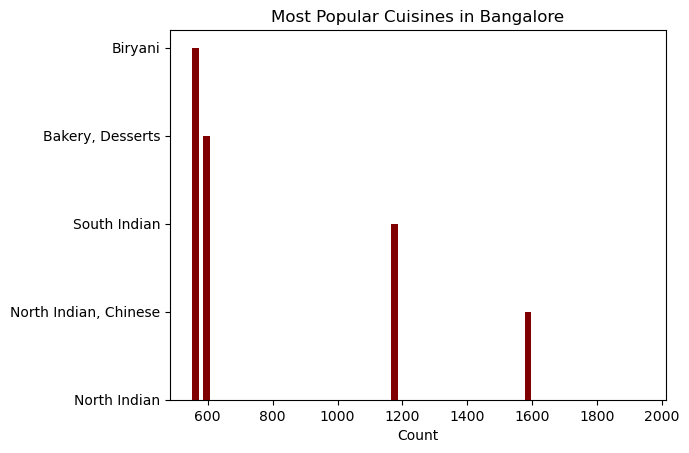

In [65]:
cuisines = after_dropping_duplicate['cuisines'].value_counts()[:5]
plt.bar(cuisines,cuisines.index,color = 'maroon',width = 20)
plt.xlabel('Count')
plt.title('Most Popular Cuisines in Bangalore')

In [66]:
#Which cuisine does coustomer likes the most
after_dropping_duplicate['rate'].value_counts().head()

rate
3.7    7721
3.9    2891
3.8    2602
4.0    2409
4.1    2282
Name: count, dtype: int64

In [67]:
after_dropping_duplicate.groupby('cuisines')[['rate']].mean().sort_values(by='rate',ascending=False).head(10).reset_index()

,cuisines,rate
0,"Continental, North Indian, Italian, South Indi...",4.900000
1,"Healthy Food, Salad, Mediterranean",4.900000
2,"Asian, Chinese, Thai, Momos",4.900000
3,"Asian, Mediterranean, North Indian, BBQ",4.800000
4,"North Indian, European, Mediterranean, BBQ",4.800000
5,"European, Mediterranean, North Indian, BBQ",4.783333
6,"American, Tex-Mex, Burger, BBQ, Mexican",4.750000
7,"Continental, European, BBQ, Chinese, Asian",4.700000
8,"BBQ, North Indian, Continental, Chinese",4.700000
9,"Asian, Burmese",4.700000


In [68]:
#Average cost of cuisines in different location
after_dropping_duplicate.groupby(['location','cuisines'])[['approx_cost(for two people)']].mean().sort_values(by='approx_cost(for two people)',ascending=False).head(10).reset_index()

,location,cuisines,approx_cost(for two people)
0,Old Airport Road,"French, Italian",6000.0
1,Marathahalli,"Continental, Fast Food",4500.0
2,Sankey Road,"North Indian, Continental, Japanese, Chinese, ...",4100.0
3,Richmond Road,Japanese,4000.0
4,Lavelle Road,Italian,4000.0
5,Residency Road,"Steak, Mediterranean, Grill",4000.0
6,Sankey Road,South Indian,4000.0
7,Seshadripuram,"North Indian, Kashmiri, Mughlai",3700.0
8,Old Airport Road,"Thai, Japanese, Chinese",3500.0
9,Richmond Road,"North Indian, Mughlai",3500.0


In [69]:
#Highest voted restaurant
after_dropping_duplicate.groupby('name')[['votes']].mean().sort_values(by='votes',ascending = False).head(10).reset_index()

,name,votes
0,Byg Brewski Brewing Company,16588.500000
1,Toit,14956.000000
2,The Black Pearl,9562.333333
3,Big Pitcher,9164.500000
4,Arbor Brewing Company,8396.545455
5,Prost Brew Pub,7861.666667
6,Church Street Social,7561.727273
7,Hoot,7257.000000
8,Truffles,7139.952381
9,The Hole in the Wall Cafe,7124.875000


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Byg Brewski Brewing Company'),
  Text(1, 0, 'Toit'),
  Text(2, 0, 'Big Pitcher'),
  Text(3, 0, 'Arbor Brewing Company'),
  Text(4, 0, 'Prost Brew Pub'),
  Text(5, 0, 'Church Street Social'),
  Text(6, 0, 'Hoot'),
  Text(7, 0, 'The Hole in the Wall Cafe'),
  Text(8, 0, 'The Black Pearl'),
  Text(9, 0, 'Vapour Pub  Brewery')])

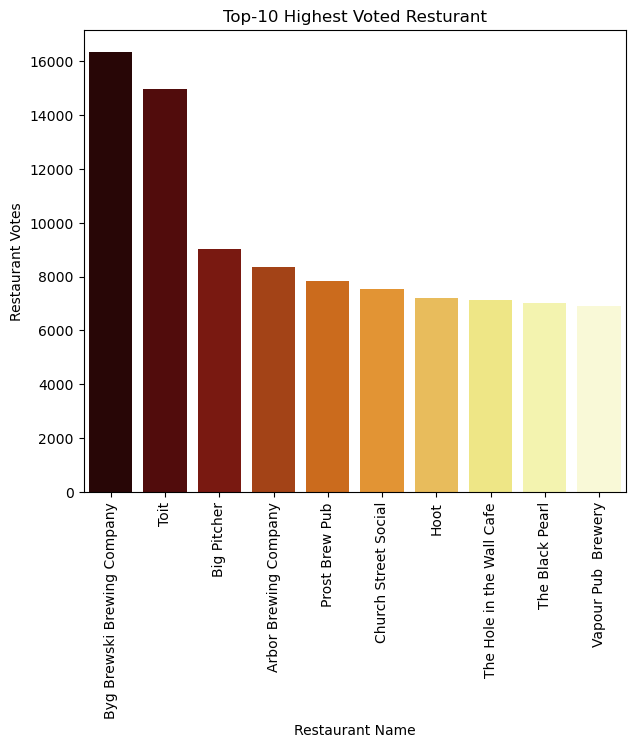

In [70]:
df_1 = after_dropping_duplicate.groupby('name')[['votes']].min().sort_values(by='votes',ascending = False).head(10).reset_index()

plt.figure(figsize=(7,6))
sns.barplot(x='name',y='votes',data=df_1,palette = 'afmhot') #inferno

plt.xlabel('Restaurant Name')
plt.ylabel('Restaurant Votes')
plt.title('Top-10 Highest Voted Resturant')
plt.xticks(rotation=90)

In [71]:
#Highest Rates Restaurant
after_dropping_duplicate.groupby('name')[['rate']].mean().sort_values(by='rate',ascending = False).head(10).reset_index()

,name,rate
0,Byg Brewski Brewing Company,4.900000
1,Asia Kitchen By Mainland China,4.900000
2,Sant Spa Cuisine,4.900000
3,Punjab Grill,4.871429
4,Belgian Waffle Factory,4.852381
5,OG Variar Sons,4.800000
6,Flechazo,4.800000
7,The Pizza Bakery,4.800000
8,CTR,4.750000
9,Barbecue by Punjab Grill,4.750000


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Sant Spa Cuisine'),
  Text(1, 0, 'Byg Brewski Brewing Company'),
  Text(2, 0, 'Asia Kitchen By Mainland China'),
  Text(3, 0, 'OG Variar  Sons'),
  Text(4, 0, 'The Pizza Bakery'),
  Text(5, 0, 'Punjab Grill'),
  Text(6, 0, 'Belgian Waffle Factory'),
  Text(7, 0, 'Barbecue by Punjab Grill'),
  Text(8, 0, 'The Black Pearl'),
  Text(9, 0, 'Taaza Thindi')])

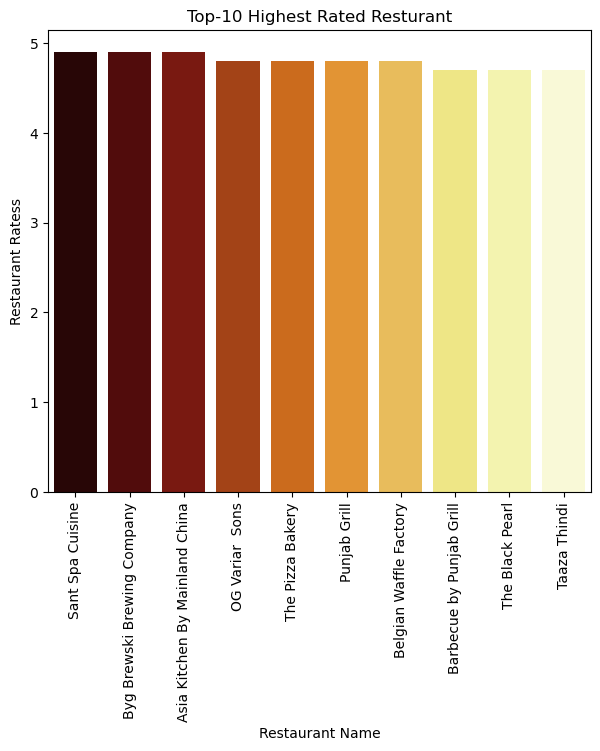

In [72]:
df_2 = after_dropping_duplicate.groupby('name')[['rate']].min().sort_values(by='rate',ascending = False).head(10).reset_index()

plt.figure(figsize=(7,6))
sns.barplot(x='name',y='rate',data=df_2 ,palette = 'afmhot') #inferno

plt.xlabel('Restaurant Name')
plt.ylabel('Restaurant Ratess')
plt.title('Top-10 Highest Rated Resturant')
plt.xticks(rotation=90)

In [73]:
#Top 10 Expensive Rest
after_dropping_duplicate.groupby('name')[['approx_cost(for two people)']].max().sort_values(by='approx_cost(for two people)',ascending = False)[0:10]  #.head(10).reset_index()

,approx_cost(for two people)
name,
Le Cirque Signature The Leela Palace,6000.0
Royal Afghan ITC Windsor,5000.0
Malties Radisson Blu,4500.0
La Brasserie Le Meridien,4100.0
Dakshin ITC Windsor,4000.0
Alba JW Marriott Bengaluru,4000.0
Masala Klub The Taj West End,4000.0
Grill 99 The RitzCarlton,4000.0
Edo Restaurant Bar ITC Gardenia,4000.0


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Le Cirque Signature  The Leela Palace'),
  Text(1, 0, 'Royal Afghan  ITC Windsor'),
  Text(2, 0, 'Malties  Radisson Blu'),
  Text(3, 0, 'La Brasserie  Le Meridien'),
  Text(4, 0, 'Dakshin  ITC Windsor'),
  Text(5, 0, 'Alba  JW Marriott Bengaluru'),
  Text(6, 0, 'Masala Klub  The Taj West End'),
  Text(7, 0, 'Grill 99  The RitzCarlton'),
  Text(8, 0, 'Edo Restaurant  Bar  ITC Gardenia'),
  Text(9, 0, 'Dum Pukht Jolly Nabobs  ITC Windsor')])

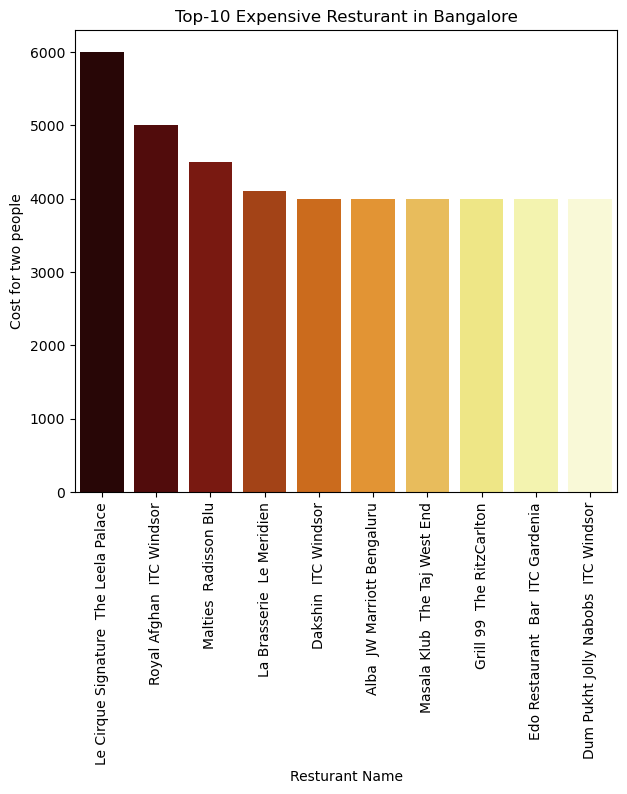

In [74]:
df_4 = after_dropping_duplicate.groupby('name').max('approx_cost(for two people)').sort_values(by='approx_cost(for two people)',ascending = False).head(10).reset_index()

plt.figure(figsize=(7,6))
sns.barplot(x='name',y='approx_cost(for two people)',data=df_4,palette = 'afmhot') #inferno

plt.xlabel('Resturant Name')
plt.ylabel('Cost for two people')
plt.title('Top-10 Expensive Resturant in Bangalore')
plt.xticks(rotation=90)

In [75]:
#Top 10 Cheapest Rest
after_dropping_duplicate.groupby('name')[['approx_cost(for two people)']].min().sort_values(by='approx_cost(for two people)',ascending = False).head(10).reset_index()

,name,approx_cost(for two people)
0,Le Cirque Signature The Leela Palace,6000.0
1,Royal Afghan ITC Windsor,5000.0
2,Malties Radisson Blu,4500.0
3,La Brasserie Le Meridien,4100.0
4,Grill 99 The RitzCarlton,4000.0
5,Masala Klub The Taj West End,4000.0
6,Edo Restaurant Bar ITC Gardenia,4000.0
7,Dum Pukht Jolly Nabobs ITC Windsor,4000.0
8,Dakshin ITC Windsor,4000.0
9,Alba JW Marriott Bengaluru,4000.0


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Le Cirque Signature  The Leela Palace'),
  Text(1, 0, 'Royal Afghan  ITC Windsor'),
  Text(2, 0, 'Malties  Radisson Blu'),
  Text(3, 0, 'La Brasserie  Le Meridien'),
  Text(4, 0, 'Grill 99  The RitzCarlton'),
  Text(5, 0, 'Masala Klub  The Taj West End'),
  Text(6, 0, 'Edo Restaurant  Bar  ITC Gardenia'),
  Text(7, 0, 'Dum Pukht Jolly Nabobs  ITC Windsor'),
  Text(8, 0, 'Dakshin  ITC Windsor'),
  Text(9, 0, 'Alba  JW Marriott Bengaluru')])

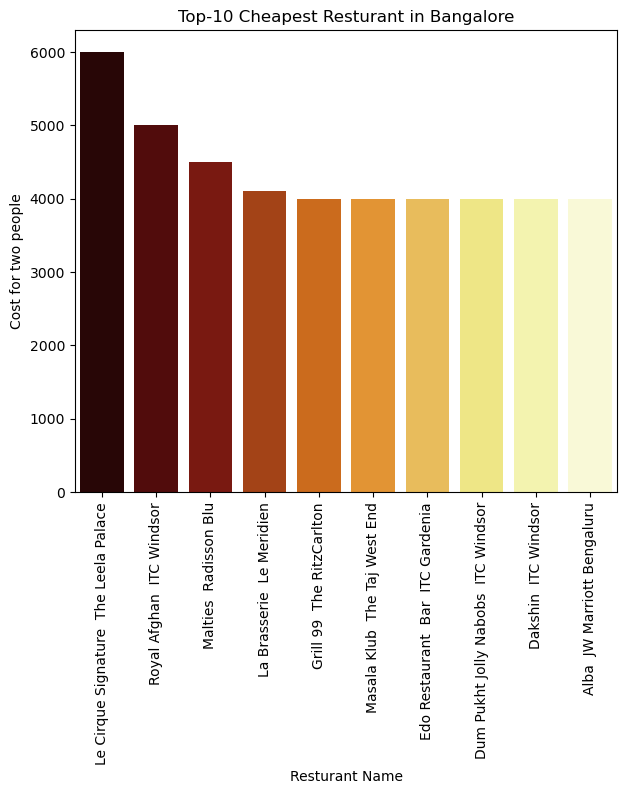

In [76]:
df_5 = after_dropping_duplicate.groupby('name')[['approx_cost(for two people)']].min().sort_values(by='approx_cost(for two people)',ascending = False).head(10).reset_index()

plt.figure(figsize=(7,6))
sns.barplot(x='name',y='approx_cost(for two people)',data=df_5,palette = 'afmhot') #inferno

plt.xlabel('Resturant Name')
plt.ylabel('Cost for two people')
plt.title('Top-10 Cheapest Resturant in Bangalore')
plt.xticks(rotation=90)

In [77]:
#total resturants at different locations of bangalore
after_dropping_duplicate.groupby('location')['name'].unique()

location
BTM                  [Sankranthi Veg Restaurant, Hearts Unlock Cafe...
Banashankari         [Jalsa, Spice Elephant, San Churro Cafe, Addhu...
Banaswadi            [Cafe Nibras, The Sanctuary, Crunch Pizzas, 9 ...
Bannerghatta Road    [Deja Vu Resto Bar, Fattoush, Empire Restauran...
Basavanagudi         [Grand Village, Timepass Dinner, Srinathjis Ca...
                                           ...                        
West Bangalore       [FreshMenu, Fit Dish Fetish, Garden City Mobil...
Whitefield           [Imperio Cafe, Night Diaries, LocalHost, ABs  ...
Wilson Garden        [Tree Top, Sahanas Nati Style, Karavali Kolima...
Yelahanka            [Prashanth Naati Corner, Red Chillies Curries ...
Yeshwantpur          [Chefs Bank, New Agarwal Bhavan, Fishing Boat,...
Name: name, Length: 94, dtype: object

In [78]:
restaurant=[]
location=[]
for key,location_df in after_dropping_duplicate.groupby('location'):
    location.append(key)
    restaurant.append(len(location_df['name'].unique()))

In [79]:
#creating dataframe
df_total = pd.DataFrame(zip(location,restaurant))
df_total.columns=['location','restaurant']
df_total.set_index('location',inplace=True)
df_total.sort_values(by='restaurant').tail(10)

,restaurant
location,
Bellandur,348
Jayanagar,352
Bannerghatta Road,448
JP Nagar,502
Indiranagar,524
Marathahalli,656
HSR,683
Electronic City,695
BTM,698


This Shows that Whitefield and BTM has the max number of restaurant

<Axes: xlabel='location'>

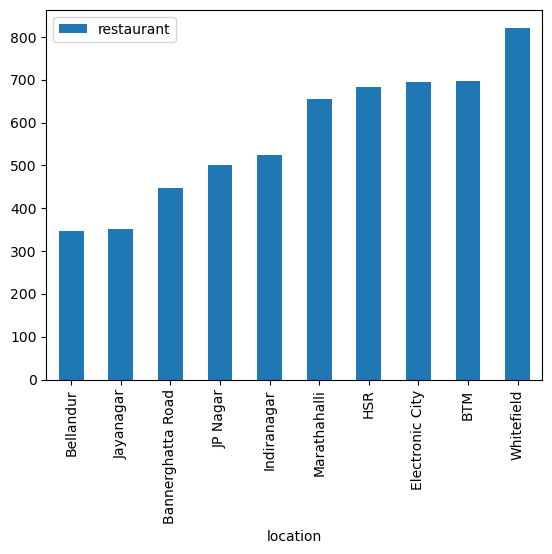

In [80]:
df_total.sort_values(by='restaurant').tail(10).plot.bar()

C:\User\Dharme\AppData\Local\Temp\ipykernel_11788\1126113665.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(after_dropping_duplicate['rate'])


<Axes: xlabel='rate', ylabel='Density'>

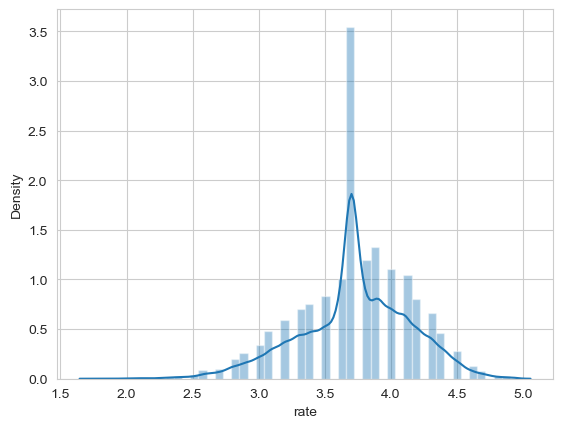

In [81]:
#Get distribution of rating column
sns.set_style(style='whitegrid')
sns.distplot(after_dropping_duplicate['rate'])

*Almoost more than 50 percent of restaurants has rating between 3 and 4 restaurants having more that 4.5 are very rare.*

Text(0, 0.5, 'Restaurant Names')

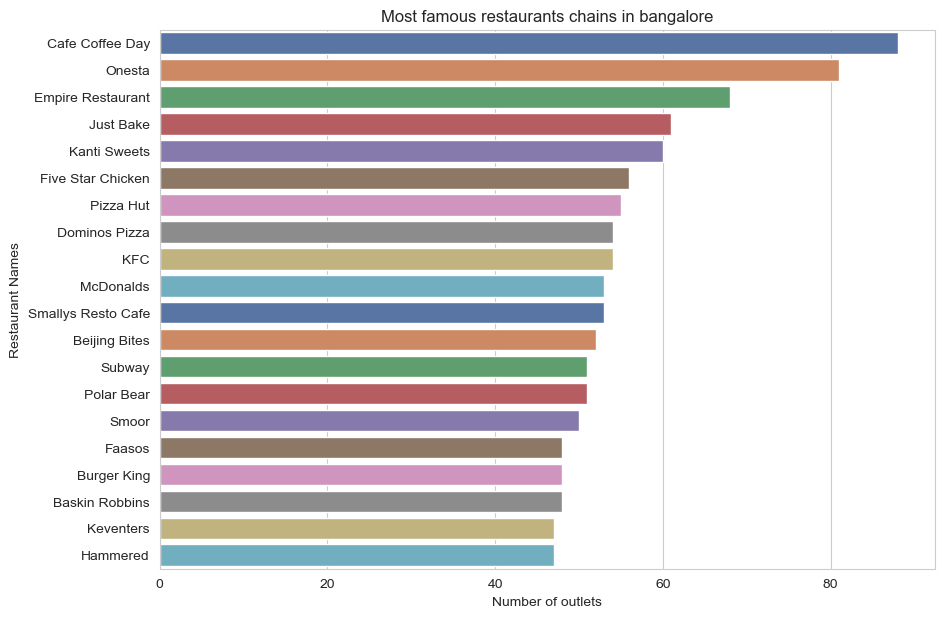

In [82]:
#Top restaurant chains in bangalore
plt.figure(figsize=(10,7))
chains = after_dropping_duplicate['name'].value_counts()[0:20]
sns.barplot(x=chains,y=chains.index,palette='deep')
plt.title('Most famous restaurants chains in bangalore')
plt.xlabel('Number of outlets')
plt.ylabel('Restaurant Names')

In [83]:
#How many Restaurants accept online orders and non online orders
after_dropping_duplicate['online_order'].value_counts()


online_order
Yes    20886
No     14223
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

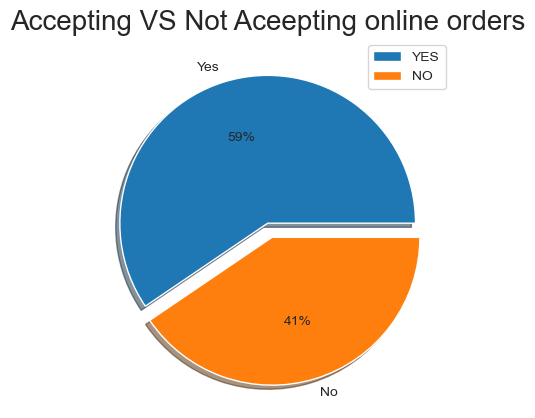

In [84]:
online_orders = after_dropping_duplicate['online_order'].value_counts()

plt.figure()
plt.pie(online_orders,labels=online_orders.index,explode=[0.0,0.1],autopct='%1.f%%',shadow=True) 

plt.legend(['YES','NO'])
plt.title('Accepting VS Not Aceepting online orders',fontsize=20)
plt.show


In [85]:
#How many Resturant have table booking facility.
after_dropping_duplicate['book_table'].value_counts()

book_table
No     29675
Yes     5434
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

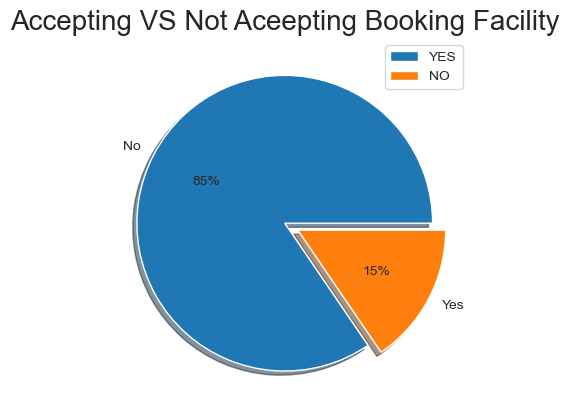

In [86]:
booking =after_dropping_duplicate['book_table'].value_counts()
plt.figure()
plt.pie(booking,labels=booking.index,explode=[0.0,0.1],autopct='%1.f%%',shadow=True) 

plt.legend(['YES','NO'])
plt.title('Accepting VS Not Aceepting Booking Facility',fontsize=20)
plt.show


In [87]:
#Top 10 Types of restaurants we have
len(after_dropping_duplicate['rest_type'].unique())

94

In [88]:
after_dropping_duplicate['rest_type'].value_counts().nlargest(10)

rest_type
Quick Bites           12196
Casual Dining          7610
Cafe                   2620
Delivery               1523
Dessert Parlor         1504
Takeaway, Delivery     1228
Casual Dining, Bar      962
Bakery                  736
Beverage Shop           490
Bar                     482
Name: count, dtype: int64

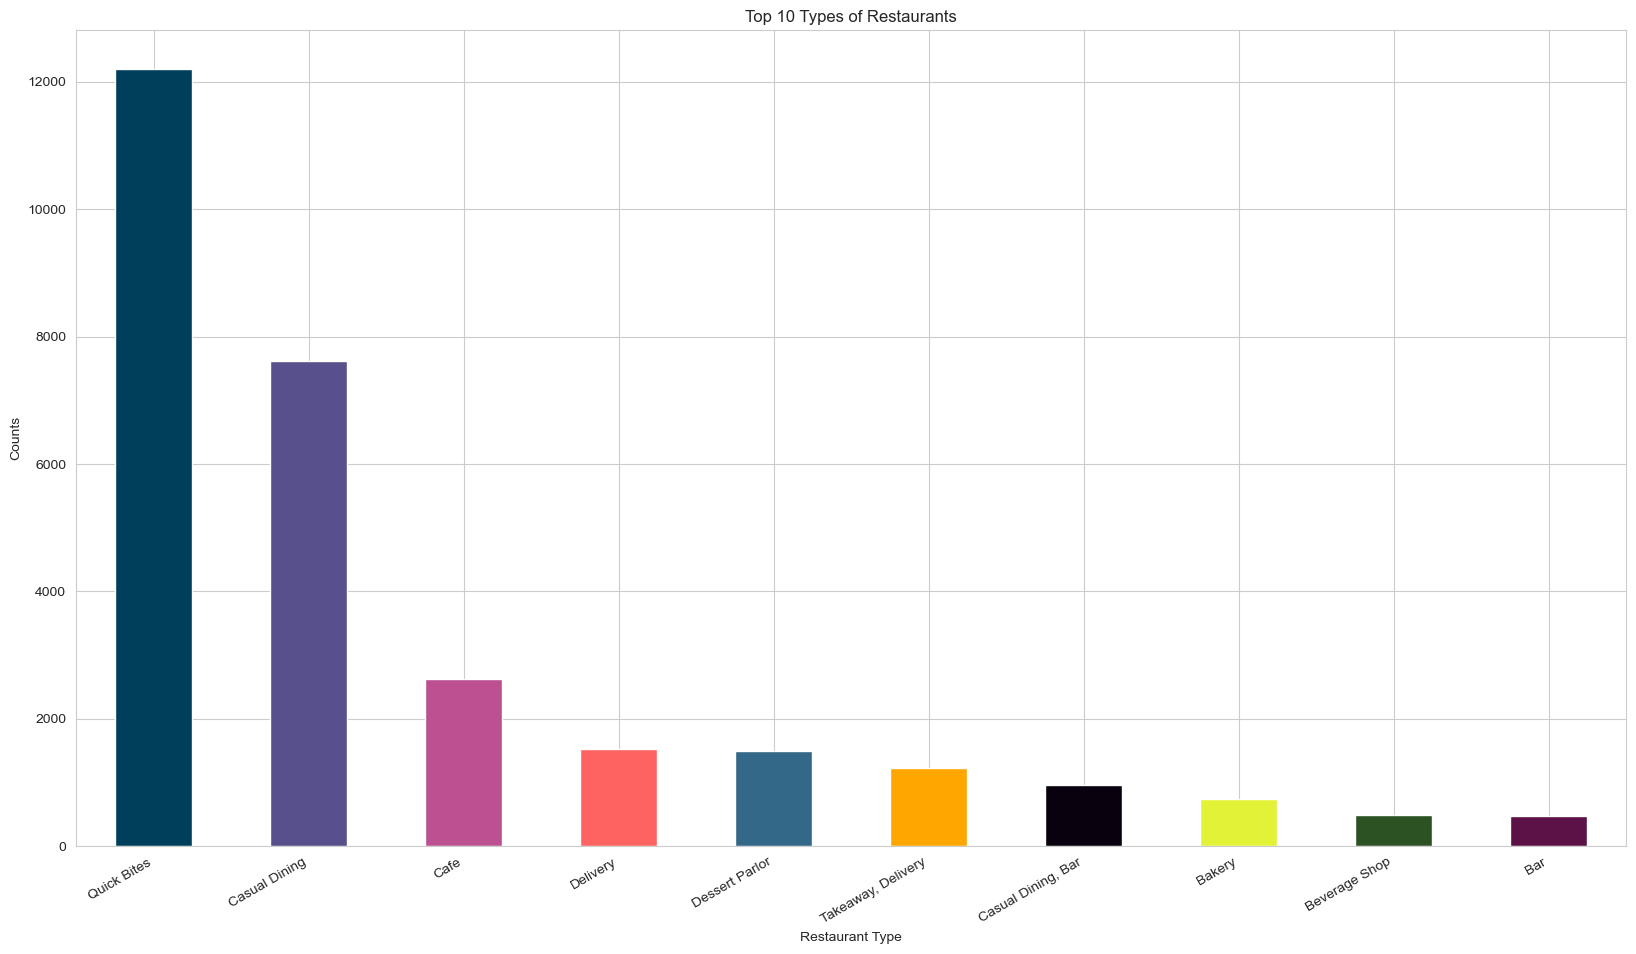

In [89]:
plt.figure(figsize=(20,12))
sns.set_style(style='whitegrid')
color_list = ['#003f5c','#58508d','#bc5090','#ff6361','#346888','#ffa600','#09010e','#e2f337','#2c5224','#5c1246']
after_dropping_duplicate['rest_type'].value_counts().nlargest(10).plot.bar(color=color_list)
plt.xlabel('Restaurant Type')
plt.ylabel('Counts')
plt.title('Top 10 Types of Restaurants')
plt.gcf().autofmt_xdate()

<Axes: xlabel='count', ylabel='location'>

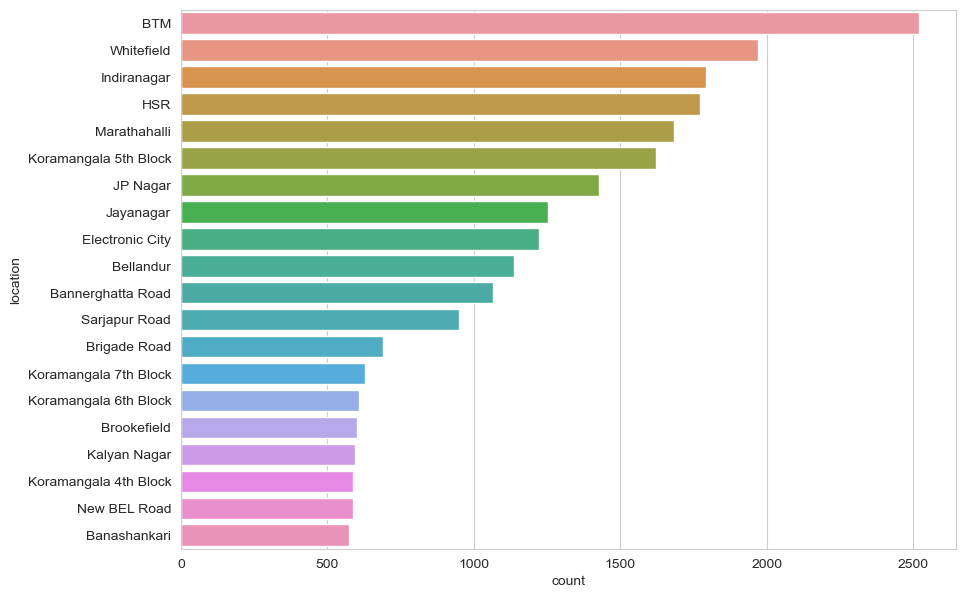

In [90]:
#Foodie Area in Bangalore
plt.figure(figsize=(10,7))
Restaurant_location = after_dropping_duplicate['location'].value_counts()[:20]
sns.barplot(x=Restaurant_location,y=Restaurant_location.index)

**We can see BTM dominates the section by having more than 2500 restaurants**

In [93]:
#top 10 cheapest rest location wise with approx cost for 2 people
data.set_index('location')
data['approx_cost(for two people)'].nsmallest(10)

5270     40.0
12232    40.0
14819    40.0
17773    40.0
18891    40.0
27091    40.0
29785    40.0
32485    40.0
1604     50.0
1892     50.0
Name: approx_cost(for two people), dtype: float64

In [93]:
#All the rest that are below than 500 (budget hotel)
after_dropping_duplicate[after_dropping_duplicate['approx_cost(for two people)']<=500]

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type)
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.000000,Buffet
10,Caf Down The Alley,Yes,No,4.1,402,Banashankari,Cafe,"Waffles, Pasta, Crispy Chicken, Honey Chilli C...",Cafe,500.000000,Cafes
12,The Coffee Shack,Yes,Yes,4.2,164,Banashankari,Cafe,"Coffee, Spaghetti, Pancakes, Nachos, Pasta, Sa...","Cafe, Chinese, Continental, Italian",500.000000,Cafes
13,CafEleven,No,No,4.0,424,Banashankari,Cafe,"Sandwich, Omelette, Ice Tea, Virgin Mojito, Ho...","Cafe, Continental",450.000000,Cafes
18,T3H Cafe,No,No,3.9,93,Banashankari,Cafe,"Cheese Maggi, Peri Peri Fries, Pasta Arrabiata","Cafe, Italian, American",300.000000,Cafes
...,...,...,...,...,...,...,...,...,...,...,...
51640,Punjabi Charchay,No,No,3.6,31,KR Puram,Quick Bites,No Info,"North Indian, Chinese",400.000000,Dine-out
51641,Andhra Spices,No,No,3.2,4,Brookefield,Quick Bites,No Info,"Andhra, Chinese, South Indian",322.415582,Dine-out
51643,New Ambur Biryani,No,No,3.7,0,Brookefield,Quick Bites,No Info,"Biryani, Kebab",300.000000,Dine-out
51644,Punjabi Thadka,No,No,3.7,0,Brookefield,Quick Bites,No Info,North Indian,400.000000,Dine-out


In [199]:
budget = after_dropping_duplicate[after_dropping_duplicate['approx_cost(for two people)']<=500].loc[:('approx_cost(for two people)')]
budget = budget.reset_index()
budget.head()

,index,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type)
0,3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,Buffet
1,10,Caf Down The Alley,Yes,No,4.1,402,Banashankari,Cafe,"Waffles, Pasta, Crispy Chicken, Honey Chilli C...",Cafe,500.0,Cafes
2,12,The Coffee Shack,Yes,Yes,4.2,164,Banashankari,Cafe,"Coffee, Spaghetti, Pancakes, Nachos, Pasta, Sa...","Cafe, Chinese, Continental, Italian",500.0,Cafes
3,13,CafEleven,No,No,4.0,424,Banashankari,Cafe,"Sandwich, Omelette, Ice Tea, Virgin Mojito, Ho...","Cafe, Continental",450.0,Cafes
4,18,T3H Cafe,No,No,3.9,93,Banashankari,Cafe,"Cheese Maggi, Peri Peri Fries, Pasta Arrabiata","Cafe, Italian, American",300.0,Cafes


C:\User\Dharme\AppData\Local\Temp\ipykernel_19160\97164054.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(after_dropping_duplicate['approx_cost(for two people)'], shade=True)


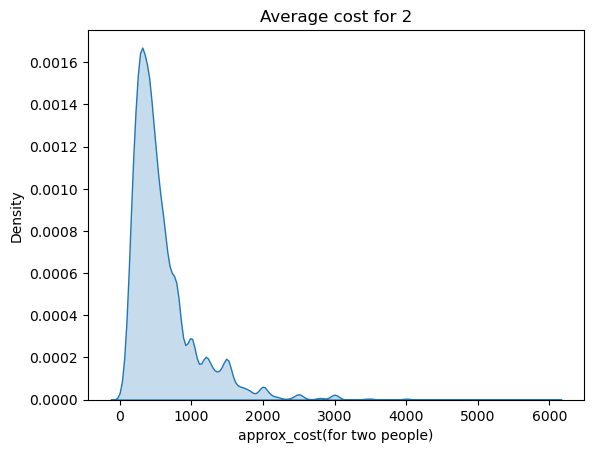

In [117]:
#Average cost of two
sns.kdeplot(after_dropping_duplicate['approx_cost(for two people)'], shade=True)
plt.title("Average cost for 2")
plt.show()

<Axes: xlabel='approx_cost(for two people)'>

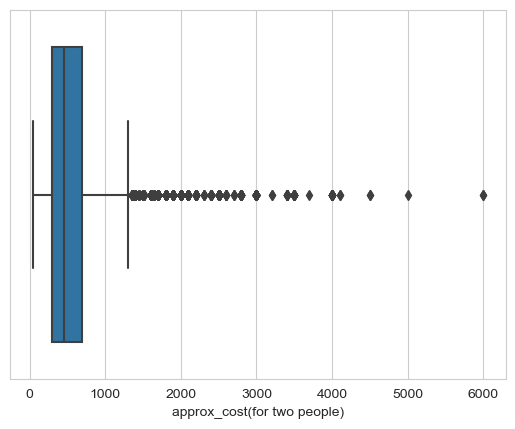

In [220]:
sns.boxplot(data=after_dropping_duplicate,x='approx_cost(for two people)')

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


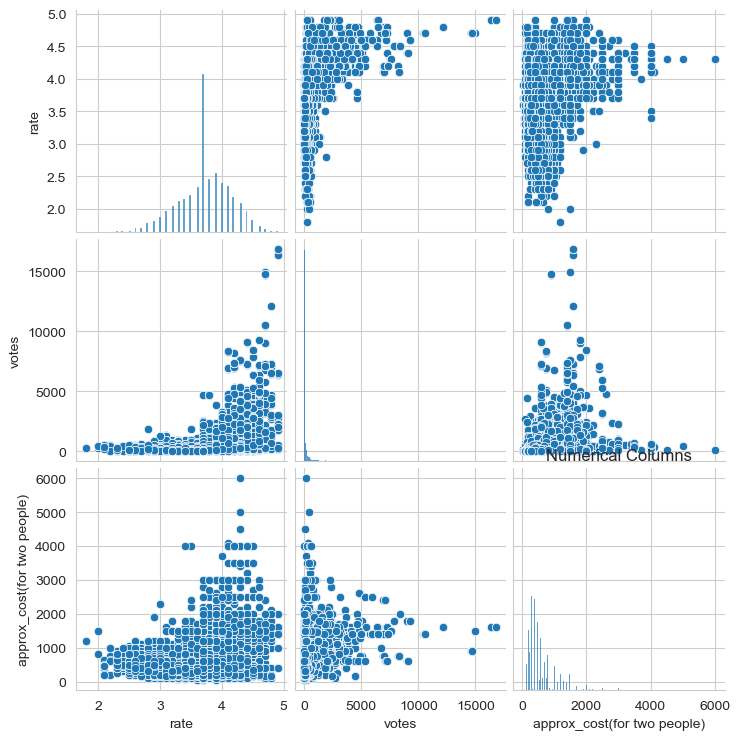

In [225]:
#correlation between numerical columns
data_1 = ['rate','votes','approx_cost(for two people)']
sns.pairplot(after_dropping_duplicate[data_1])
plt.title('Numerical Columns')
plt.show()

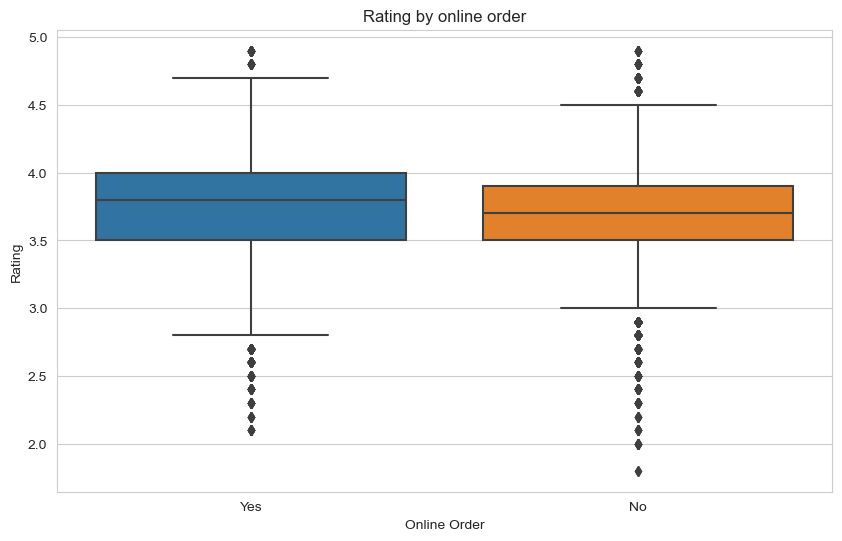

In [227]:
#Rating by online orders
plt.figure(figsize=(10,6))
sns.boxplot(x='online_order', y = 'rate', data=after_dropping_duplicate)
plt.title('Rating by online order')
plt.xlabel('Online Order')
plt.ylabel('Rating')
plt.show()